<center>

# 2023中山大学人工社会与计算社会科学讲习班

## 社会科学家的人工智能工具箱

2023年8月15日 下午

中山大学社会学与人类学学院 马昱堃 博士生
    
</center>

# 文本分析工具箱

- [词向量](https://ai.baidu.com/tech/nlp_basic/word_embedding)
- [词义相似度](https://ai.baidu.com/tech/nlp_basic/word_emb_sim)
- [短文本相似度](https://ai.baidu.com/tech/nlp_basic/simnet)
- [情绪识别](https://ai.baidu.com/tech/nlp_apply/emotion_detection)
- [情感分析](https://ai.baidu.com/tech/nlp_apply/sentiment_classify)
- [观点抽取](https://ai.baidu.com/tech/nlp_apply/comment_tag)


## API调用实例

### 词向量

https://ai.baidu.com/tech/nlp_basic/word_embedding

In [3]:
import sys
import json
import base64
import time
from urllib.request import urlopen
from urllib.request import Request
from urllib.error import URLError
from urllib.parse import urlencode
from urllib.parse import quote_plus

# skip https auth
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
keys = pd.read_csv('AccessKey.csv')

API_KEY = keys.loc[0, 'Access'] 
SECRET_KEY = keys.loc[0, 'Secret'] 

WORD2VEC_URL = "https://aip.baidubce.com/rpc/2.0/nlp/v2/word_emb_vec"

# TOKEN start
TOKEN_URL = 'https://aip.baidubce.com/oauth/2.0/token'

In [4]:
# get token
def fetch_token():
    params = {'grant_type': 'client_credentials',
              'client_id': API_KEY,
              'client_secret': SECRET_KEY}
    post_data = urlencode(params)
    post_data = post_data.encode('utf-8')
    req = Request(TOKEN_URL, post_data)
    try:
        f = urlopen(req, timeout=5)
        result_str = f.read()
    except URLError as err:
        print(err)

    result_str = result_str.decode()

    result = json.loads(result_str)

    if ('access_token' in result.keys() and 'scope' in result.keys()):
        if not 'brain_all_scope' in result['scope'].split(' '):
            print ('please ensure has check the  ability')
            exit()
        return result['access_token']
    else:
        print ('please overwrite the correct API_KEY and SECRET_KEY')

# call remote http server

def make_request(url, word):
    print(f"{'-'*50}\n当前测试词为“{word}”，词向量返回结果为：")

    response = request(url, json.dumps(
    {
        "word": word,
    }))

    data = json.loads(response)

    if "error_code" not in data or data["error_code"] == 0:
        print(data)
        time.sleep(0.2)
        return data
    else:
        # print error response
        print(response)

# call remote http server
def request(url, data):
    req = Request(url, data.encode('utf-8'))
    has_error = False
    try:
        f = urlopen(req)
        result_str = f.read()
        result_str = result_str.decode()
        return result_str
    except  URLError as err:
        print(err)

In [8]:
words = ["学校", "老师", "学生", "教室", "教师"]

# get access token
token = fetch_token()

# concat url
url = WORD2VEC_URL + "?charset=UTF-8&access_token=" + token

results = {}
for word in words[:]:
    results[word] = make_request(url, word)

--------------------------------------------------
当前测试词为“学校”，词向量返回结果为：
{'log_id': 8981565757387733806, 'word': '学校', 'vec': [0.250658, 0.0698114, 0.499891, 0.0592037, -0.173398, -0.0445099, 0.215687, -0.705988, 0.631923, 0.570925, 0.0126325, -0.0936614, 0.00694283, 0.825201, 0.744213, 0.46322, -0.188569, 0.410236, -0.589385, 0.0868245, 0.473176, 0.500326, -0.535191, -0.0743877, -0.492518, 0.431877, -0.314854, -0.226961, 0.322763, -0.15525, 0.451592, -0.341739, -0.0500459, -0.275875, 0.425515, -0.0627791, -0.416862, 0.197756, 0.678146, 0.192684, 0.386058, 0.22275, 0.407993, 0.194038, 0.328454, -0.409261, 0.29077, 0.178976, -0.0745698, 0.202974, -0.181901, 0.172387, 0.229449, -0.199134, 0.360079, -0.0724555, 0.450643, 0.0976685, 0.119619, -0.0150152, -0.464444, -0.202914, 0.0878095, 0.292892, -0.0373143, -0.18583, 0.304824, -0.30509, -0.14936, -0.297871, 0.339078, -0.413953, -0.13325, -0.450376, -0.549599, -0.0049666, 0.0746918, 0.124429, 0.104165, -0.45583, -0.42725, 0.463254, 0.217374

--------------------------------------------------
当前测试词为“老师”，词向量返回结果为：
{'log_id': 793436847494872270, 'word': '老师', 'vec': [-0.222915, 0.44683, -0.0252651, 0.306647, -0.483852, -0.0601922, 0.859584, -0.393346, -0.611885, 0.463189, 0.500951, -0.767661, -0.118786, 0.0294671, 0.872077, -0.929279, 0.190919, 0.722171, -0.0127159, -0.146784, -0.404758, 0.298689, 0.468917, -0.881221, -0.959389, 0.170308, -0.109636, 0.475956, -0.309651, -0.383572, 0.175682, 0.277998, 0.0700472, 0.190943, -0.21842, -0.082766, 0.154104, 0.0460401, 0.228588, 0.00980831, 0.79663, -0.565784, 0.0405106, 0.5505, -0.216297, -1.01848, 0.139225, -0.0908215, -0.388204, 0.0463082, -0.704561, -0.28281, -0.510155, -0.347634, 0.855489, -0.650777, 0.186225, -0.242032, -0.134936, -0.260912, -0.809505, -0.0707971, -0.367278, -0.229609, 0.778083, 0.33622, -0.152365, -0.619581, 0.786464, 0.303557, 0.455778, -0.437941, 0.588549, -0.209205, -0.263397, -0.405332, 0.627137, -0.392229, -0.425028, 0.41575, 0.180914, 1.13437, -0.114349

--------------------------------------------------
当前测试词为“学生”，词向量返回结果为：
{'log_id': 8029600744556354574, 'word': '学生', 'vec': [0.824211, -0.0170465, 0.110846, -0.14442, -0.114005, 0.768425, 0.646645, -0.160551, 0.179419, 0.391738, 0.714579, -0.448889, -0.101949, -0.233653, 0.464271, -0.0886679, -0.250431, 0.646593, 0.213873, -0.642871, 0.701155, 0.420048, 0.135656, -0.464144, -0.819587, 0.134001, -0.220662, 0.258532, 0.163626, 0.267366, 1.39867, -0.459093, 0.403961, 0.183596, 0.682748, 0.225398, -0.950767, 0.182931, -1.1138, 0.372116, 0.462544, 0.44708, 0.646106, 1.0519, -0.284583, -0.0319141, 0.583635, -0.646743, 0.979096, -0.708254, 0.0688545, -0.229862, -0.509694, 0.593304, -0.117788, -0.343002, -0.11602, 0.537544, 0.72677, -0.143969, -0.148831, 0.0471925, -0.30795, -0.204123, 0.135667, -0.25671, 0.851137, -0.0575259, 0.625918, 0.127624, -0.0673974, 0.0911238, 0.430318, -0.389553, 0.381741, -0.0821644, 0.196538, 0.290316, -0.441349, -0.00908647, 0.387875, 0.72099, 0.62805, 0.655471, 

--------------------------------------------------
当前测试词为“教室”，词向量返回结果为：
{'log_id': 5139916953333031630, 'word': '教室', 'vec': [0.284847, 0.629703, 0.314236, -0.0311369, -0.690585, 0.240541, -0.0483862, -1.24611, 0.507753, 0.317408, -0.285428, -0.161973, 0.257884, -0.297099, 0.156322, 0.204597, 0.179752, 0.690444, 0.0595218, -0.427864, 0.0796217, -0.43466, -0.360314, -0.332793, -1.69756, 0.301732, 0.401192, 0.0242013, 0.603498, -0.654071, 0.991337, -0.0345127, -0.606454, 0.631596, 0.306873, 0.00164732, 0.342676, -0.198898, -1.18246, 0.338989, 0.863542, 0.402625, 1.04041, -0.506284, -0.0472378, 0.173321, 0.00452804, 0.199601, 0.348857, 0.157496, -0.648259, -0.0828888, -0.356616, -0.290542, 0.149214, 0.184846, -0.629729, -0.175612, -0.0848833, 0.135596, -0.316656, -0.0680375, 0.181855, -0.189541, 0.0668901, -0.270464, -0.42378, -0.171434, 0.310451, -0.075347, 0.54954, -0.391852, 0.0840572, -0.349927, -0.394299, 0.664977, 0.259939, -0.144955, -0.0352328, 0.268125, -0.249986, 0.576493, 0.051

--------------------------------------------------
当前测试词为“教师”，词向量返回结果为：
{'log_id': 5337367594218763086, 'word': '教师', 'vec': [-0.15875, 0.288106, 0.704205, 0.0122836, 0.479322, 0.8221, -0.0603499, 0.591183, 0.0915951, 0.779448, 0.965948, 0.257722, 0.194615, 0.729319, 0.0687413, -0.519157, -0.952753, 0.582799, -0.906658, -0.0311363, -0.334671, 0.236252, 0.00251398, -1.01686, -1.57976, 0.175275, -0.424671, 0.147066, -0.292618, -0.385107, 0.0635635, -0.211118, 0.0400117, 0.162703, 0.303432, -1.1447, 0.0228564, 1.15376, -0.503499, -0.632039, 0.434637, 0.914931, 0.437711, 0.200057, 0.620942, 0.0272284, 0.912207, 0.347396, 0.344152, 1.04298, -0.0130095, -1.54754, -0.6683, 0.965124, 0.140127, -0.685593, -0.452758, 0.560335, -0.0879887, 0.396887, 0.427561, -0.00616392, 0.152177, -0.628141, 0.654203, -0.0923584, -0.142312, -0.132473, 0.470261, -0.655731, -0.170809, -0.282786, -0.550534, 0.872904, -0.0522486, 0.0666915, -0.0795765, 0.858646, 0.574477, -1.09175, 0.545655, 0.170719, -0.453097, -0.

In [9]:
import numpy as np

In [10]:
# 计算词向量余弦相似度
v1 = np.array(results['老师']['vec'])
v2 = np.array(results['教师']['vec'])
print(f"老师和教师的相似度为：{(np.dot(v1, v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))): .6f}")

老师和教师的相似度为： 0.222839


### 情绪识别

https://ai.baidu.com/tech/nlp_apply/emotion_detection

In [13]:
import sys
import json
import base64
import time
from urllib.request import urlopen
from urllib.request import Request
from urllib.error import URLError
from urllib.parse import urlencode
from urllib.parse import quote_plus

# skip https auth
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

API_KEY = keys.loc[0, 'Access'] 
SECRET_KEY = keys.loc[0, 'Secret']

SENTIMENT_URL = 'https://aip.baidubce.com/rpc/2.0/nlp/v1/emotion'

# TOKEN start
TOKEN_URL = 'https://aip.baidubce.com/oauth/2.0/token'

In [14]:
# get token
def fetch_token():
    params = {'grant_type': 'client_credentials',
              'client_id': API_KEY,
              'client_secret': SECRET_KEY}
    post_data = urlencode(params)
    post_data = post_data.encode('utf-8')
    req = Request(TOKEN_URL, post_data)
    try:
        f = urlopen(req, timeout=5)
        result_str = f.read()
    except URLError as err:
        print(err)

    result_str = result_str.decode()

    result = json.loads(result_str)

    if ('access_token' in result.keys() and 'scope' in result.keys()):
        if not 'brain_all_scope' in result['scope'].split(' '):
            print ('please ensure has check the  ability')
        return result['access_token']
    else:
        print ('please overwrite the correct API_KEY and SECRET_KEY')

# call remote http server

def make_request(url, text):
    print(f"{'-'*50}\n当前测试文本为“{text}”，返回结果为：")

    response = request(url, json.dumps(
    {
        "text": text,
    }))

    data = json.loads(response)

    if "error_code" not in data or data["error_code"] == 0:
        print(data)
        time.sleep(0.5)
        return data
    else:
        # print error response
        print(response)

# call remote http server
def request(url, data):
    req = Request(url, data.encode('utf-8'))
    has_error = False
    try:
        f = urlopen(req)
        result_str = f.read()
        result_str = result_str.decode()
        return result_str
    except  URLError as err:
        print(err)

In [15]:
text = ["上课使我非常快乐"]

# get access token
token = fetch_token()

# concat url
url = SENTIMENT_URL + "?charset=UTF-8&access_token=" + token

make_request(url, text[0])

--------------------------------------------------
当前测试文本为“上课使我非常快乐”，返回结果为：
{'items': [{'prob': 0.521854, 'label': 'neutral', 'subitems': [], 'replies': []}, {'prob': 0.47807, 'label': 'optimistic', 'subitems': [], 'replies': []}, {'prob': 7.53222e-05, 'label': 'pessimistic', 'subitems': [], 'replies': []}], 'text': '上课使我非常快乐', 'log_id': 1560820622853450880}


{'items': [{'prob': 0.521854,
   'label': 'neutral',
   'subitems': [],
   'replies': []},
  {'prob': 0.47807, 'label': 'optimistic', 'subitems': [], 'replies': []},
  {'prob': 7.53222e-05,
   'label': 'pessimistic',
   'subitems': [],
   'replies': []}],
 'text': '上课使我非常快乐',
 'log_id': 1560820622853450880}

# 大模型API调用-以讯飞星火为例

https://www.xfyun.cn/solutions/xinghuoAPI

In [12]:
import SparkApi
import pandas as pd

SparkAPI_df = pd.read_csv('SparkAPI.txt')

#以下密钥信息从控制台获取
appid = SparkAPI_df.loc[0,'APPID']     #填写控制台中获取的 APPID 信息
api_secret = SparkAPI_df.loc[0,'APISecret']   #填写控制台中获取的 APISecret 信息
api_key =SparkAPI_df.loc[0,'APIKey']    #填写控制台中获取的 APIKey 信息

#用于配置大模型版本，默认“general/generalv2”
domain = "general"   # v1.5版本
# domain = "generalv2"    # v2.0版本
#云端环境的服务地址
Spark_url = "ws://spark-api.xf-yun.com/v1.1/chat"  # v1.5环境的地址
# Spark_url = "ws://spark-api.xf-yun.com/v2.1/chat"  # v2.0环境的地址


text =[]

# length = 0

def getText(role,content):
    jsoncon = {}
    jsoncon["role"] = role
    jsoncon["content"] = content
    text.append(jsoncon)
    return text

def getlength(text):
    length = 0
    for content in text:
        temp = content["content"]
        leng = len(temp)
        length += leng
    return length

def checklen(text):
    while (getlength(text) > 8000):
        del text[0]
    return text

In [14]:
Input = input("\n" +"我:")
question = checklen(getText("user",Input))
SparkApi.answer =""
print("星火:",end = "")
SparkApi.main(appid,api_key,api_secret,Spark_url,domain,question)
getText("assistant",SparkApi.answer)
# print(str(text))


我:你好
星火:你好！有什么我可以帮助你的吗？

[{'role': 'user', 'content': '你好'},
 {'role': 'assistant', 'content': '你好！有什么我可以帮助你的吗？'}]

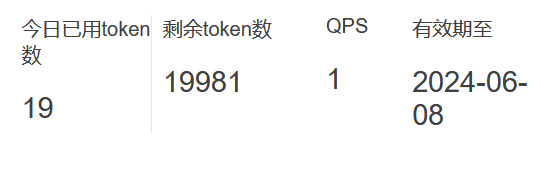